In [2]:
#Lucas Ross Feb 17 2023

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
#set display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

df = pd.read_csv("titanic.csv")
print(len(df))
df.head(5)

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Part 1: Introduction

0    549
1    342
Name: Survived, dtype: int64


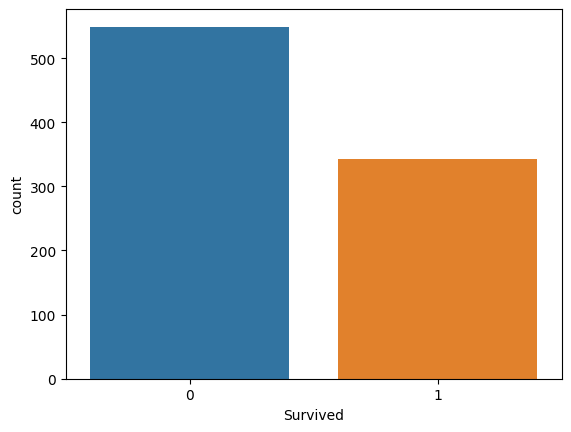

In [4]:
#graph of survived
sns.countplot(data=df, x="Survived")
print(df.Survived.value_counts())

<AxesSubplot:xlabel='Survived', ylabel='count'>

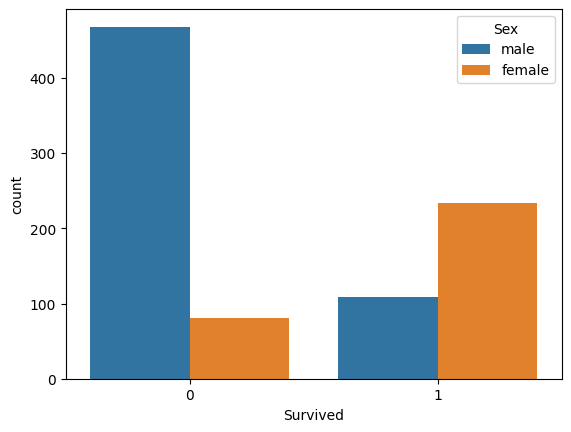

In [5]:
sns.countplot(data=df, x="Survived", hue="Sex")

In [6]:
#group survived by sex, then only show sex columns (sex columns have survived values)
print(df.groupby(["Survived", "Sex"])["Sex"].value_counts())
print("-" * 50)
#get a pivot table that shows counts (aggfunc) of Survived x Sex, each row is different by PassengerId
print(df.pivot_table(index="Survived", columns="Sex", values="PassengerId", aggfunc="count"))

Survived  Sex     Sex   
0         female  female     81
          male    male      468
1         female  female    233
          male    male      109
Name: Sex, dtype: int64
--------------------------------------------------
Sex       female  male
Survived              
0             81   468
1            233   109


<AxesSubplot:xlabel='Survived', ylabel='count'>

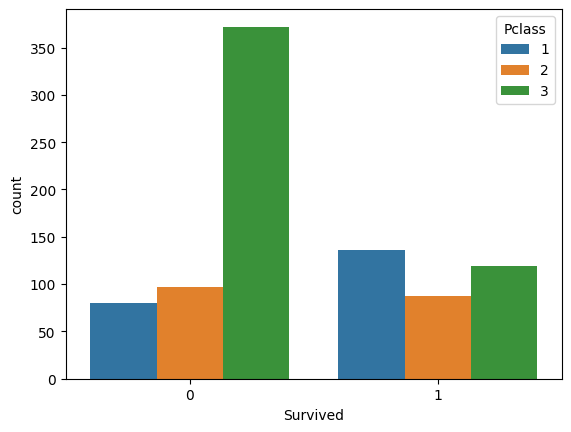

In [7]:
sns.countplot(data=df, x="Survived", hue="Pclass")

In [8]:
print(df.pivot_table(index="Survived", columns="Pclass", values="PassengerId", aggfunc="count"))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [9]:
grouped = df.groupby(["Survived", "Age"])["Age"].count()

for index, count in grouped.items():
    print(f"Survived: {index[0]}, Age: {index[1]}, Count: {count}")

Survived: 0, Age: 1.0, Count: 2
Survived: 0, Age: 2.0, Count: 7
Survived: 0, Age: 3.0, Count: 1
Survived: 0, Age: 4.0, Count: 3
Survived: 0, Age: 6.0, Count: 1
Survived: 0, Age: 7.0, Count: 2
Survived: 0, Age: 8.0, Count: 2
Survived: 0, Age: 9.0, Count: 6
Survived: 0, Age: 10.0, Count: 2
Survived: 0, Age: 11.0, Count: 3
Survived: 0, Age: 14.0, Count: 3
Survived: 0, Age: 14.5, Count: 1
Survived: 0, Age: 15.0, Count: 1
Survived: 0, Age: 16.0, Count: 11
Survived: 0, Age: 17.0, Count: 7
Survived: 0, Age: 18.0, Count: 17
Survived: 0, Age: 19.0, Count: 16
Survived: 0, Age: 20.0, Count: 12
Survived: 0, Age: 20.5, Count: 1
Survived: 0, Age: 21.0, Count: 19
Survived: 0, Age: 22.0, Count: 16
Survived: 0, Age: 23.0, Count: 10
Survived: 0, Age: 23.5, Count: 1
Survived: 0, Age: 24.0, Count: 15
Survived: 0, Age: 24.5, Count: 1
Survived: 0, Age: 25.0, Count: 17
Survived: 0, Age: 26.0, Count: 12
Survived: 0, Age: 27.0, Count: 7
Survived: 0, Age: 28.0, Count: 18
Survived: 0, Age: 28.5, Count: 2
Survive

<AxesSubplot:>

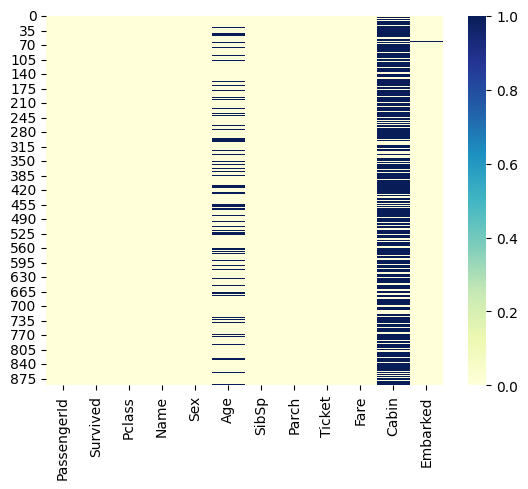

In [10]:
df.isnull().sum() #get number of NaN
sns.heatmap(df.isnull(), cmap="YlGnBu") #each row is a different row, blue lines = null values
# (cmap="YlGnBu" is for color, Yellow --> Green --> Blue)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

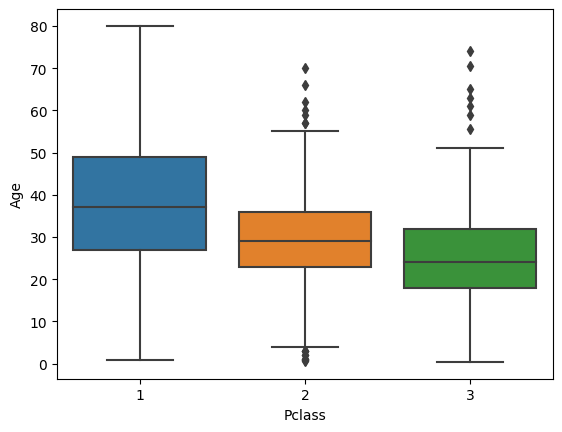

In [11]:
sns.boxplot(data=df, x="Pclass", y="Age")
#first class passengers are generally older

## Part 2: Data Cleaning

In [12]:
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
#one-hot encoding for Sex (male/female --> 0/1)
sex = pd.get_dummies(data=df["Sex"])

#same thing for embarked
embark = pd.get_dummies(df["Embarked"], drop_first=True) #drop_first=True removes the first option for categories

#and pclass
pcl = pd.get_dummies(df["Pclass"], drop_first=True)

In [14]:
#now add them to the df
df = pd.concat([df, sex, embark, pcl], axis=1)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0,0,1,0,0


In [15]:
#now remove prev columns and string variables
df.drop(["Pclass", "Sex", "Embarked", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,female,male,Q,S,2,3
1,2,1,38.00,1,0,71.2833,1,0,0,0,0,0
3,4,1,35.00,1,0,53.1000,1,0,0,1,0,0
6,7,0,54.00,0,0,51.8625,0,1,0,1,0,0
10,11,1,4.00,1,1,16.7000,1,0,0,1,0,1
11,12,1,58.00,0,0,26.5500,1,0,0,1,0,0
21,22,1,34.00,0,0,13.0000,0,1,0,1,1,0
23,24,1,28.00,0,0,35.5000,0,1,0,1,0,0
27,28,0,19.00,3,2,263.0000,0,1,0,1,0,0
52,53,1,49.00,1,0,76.7292,1,0,0,0,0,0
54,55,0,65.00,0,1,61.9792,0,1,0,0,0,0


## Part 3: Train and Test

In [16]:
#graph logistic reg model of survival
x = df.drop("Survived", axis=1)
y = df["Survived"]

In [17]:
#split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [18]:
logmodel = LogisticRegression(max_iter=1000, C=1.0)

In [19]:
logmodel.fit(xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=1000)

In [20]:
predictions = logmodel.predict(xtest)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [21]:
confusion_matrix(ytest, predictions)

array([[10,  7],
       [ 6, 32]])

In [22]:
accuracy_score(ytest, predictions) #76.4% --> not too bad

0.7636363636363637